In [3]:
from PIL import Image

def check_image_mode(image_path):
    image = Image.open(image_path)
    if image.mode == 'L':
        return 'grayscale'
    elif image.mode == 'RGB':
        return 'RGB'
    else:
        return f'other (mode: {image.mode})'

# Test the function with example images
image_path1 = '/Users/mahmudul/Desktop/01_0001_0_08_0916_1990_1.png'
image_path2 = '/Users/mahmudul/Desktop/download.jpeg'

print(f"The image {image_path1} is {check_image_mode(image_path1)}.")
print(f"The image {image_path2} is {check_image_mode(image_path2)}.")


The image /Users/mahmudul/Desktop/01_0001_0_08_0916_1990_1.png is grayscale.
The image /Users/mahmudul/Desktop/download.jpeg is RGB.


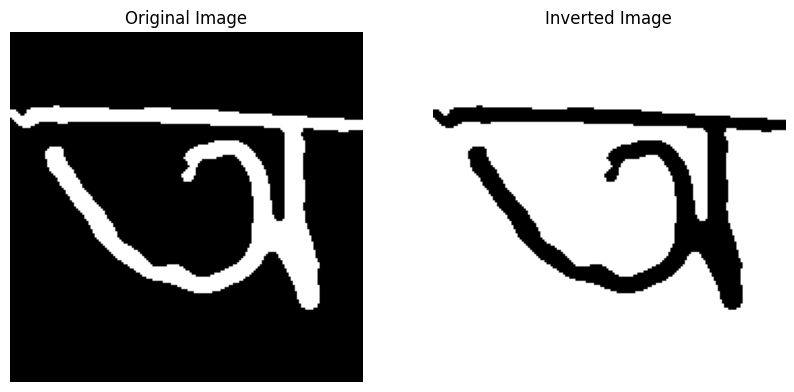

In [1]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

def invert_grayscale_image(image_path):
    # Open the image
    image = Image.open(image_path)

    # Ensure the image is in grayscale mode
    if image.mode != 'L':
        raise ValueError("The image is not in grayscale mode.")
    
    # Invert the image
    inverted_image = ImageOps.invert(image)
    
    return image, inverted_image

def plot_images(original_image, inverted_image):
    # Create a figure with two subplots
    plt.figure(figsize=(10, 5))
    
    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Plot the inverted image
    plt.subplot(1, 2, 2)
    plt.imshow(inverted_image, cmap='gray')
    plt.title('Inverted Image')
    plt.axis('off')
    
    # Display the plot
    plt.show()

# Example usage
image_path = '/Users/mahmudul/Desktop/01_0001_0_08_0916_1990_1.png'
original_image, inverted_image = invert_grayscale_image(image_path)
plot_images(original_image, inverted_image)


Image Augmentation Code

In [6]:
import os
from PIL import Image, ImageFilter
import torchvision.transforms as transforms
import random

class AddBlur(object):
    def __init__(self, radius=2):
        self.radius = radius

    def __call__(self, image):
        return image.filter(ImageFilter.GaussianBlur(radius=self.radius))

    def __repr__(self):
        return f'{self.__class__.__name__}(radius={self.radius})'

def augment_image(image, num_augmentations=5):
    augmentations = [
        transforms.RandomRotation(degrees=30),
        AddBlur(radius=2)
    ]

    augmented_images = []
    for _ in range(num_augmentations):
        transform = transforms.Compose(random.sample(augmentations, k=random.randint(1, len(augmentations))))
        augmented_image = transform(image)
        augmented_images.append(augmented_image)
    
    return augmented_images

def save_images(images, output_dir, base_name):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for i, img in enumerate(images):
        img.save(os.path.join(output_dir, f"{base_name}_aug_{i}.png"))

def augment_images_in_folder(input_dir, output_dir, num_augmentations=5):
    for filename in os.listdir(input_dir):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            image_path = os.path.join(input_dir, filename)
            image = Image.open(image_path)

            augmented_images = augment_image(image, num_augmentations=num_augmentations)
            base_name, _ = os.path.splitext(filename)
            save_images(augmented_images, output_dir, base_name)

# Example usage
input_dir = '/Users/mahmudul/Desktop/AI_tester/input_folder'
output_dir = '/Users/mahmudul/Desktop/AI_tester/output_folder'
augment_images_in_folder(input_dir, output_dir, num_augmentations=5)
